In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('../data/TCGA_BRCA_loc_mutf.csv', index_col = 0)
print(data.shape)

(986, 996)


In [144]:
pc_data = data.iloc[:, :989]
pc_data.shape

(986, 989)

Text(0.5,1,'Explained Variance of Principal Components')

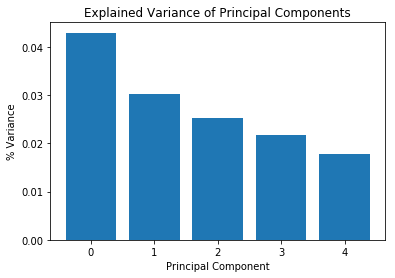

In [101]:
pca = PCA(n_components=5)
pc = pca.fit_transform(pc_data)

plt.bar(np.arange(0, 5), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% Variance')
plt.title('Explained Variance of Principal Components')

In [145]:
data = pd.read_csv('../data/TCGA_BRCA_loc_mutf.csv')
pheno = data.iloc[:, 996]

IndexError: single positional indexer is out-of-bounds

In [92]:
pc = pd.DataFrame(pc)
pc['outcome'] = pheno
#for i in range(pc.shape[0]):
#    if str(pc.iloc[i, 5]) == 'not reported':
#        pc.drop(pc.index[i])

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


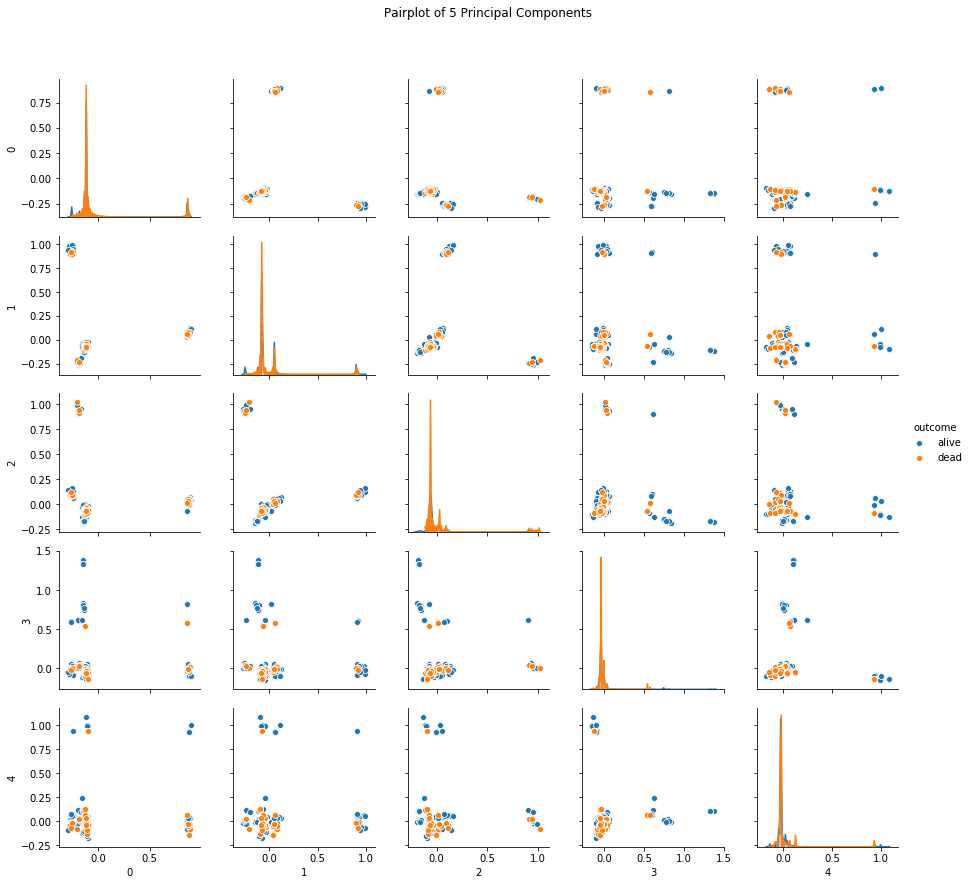

In [177]:
ax = sns.pairplot(pc, hue='outcome')
ax.fig.suptitle('Pairplot of 5 Principal Components')
ax.fig.subplots_adjust(top=.9)

In [138]:
variance = pc_data.var()
names = variance.index
mean_variance = np.mean(variance)
above = 0
col_name = []
for i in range(len(variance)):
    if variance.iloc[i] > 0.05:
        above += 1
        col_name.append(names[i])
        
above

70

Text(0.5,1,'Explained Variance of Principal Components w/ Low Variance Filter')

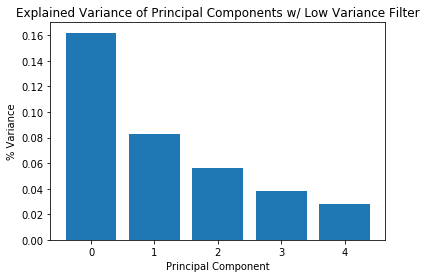

In [178]:
high_var_data = data[col_name]
pca = PCA(n_components=5)
pc = pca.fit_transform(high_var_data)

plt.bar(np.arange(0, 5), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('% Variance')
plt.title('Explained Variance of Principal Components w/ Low Variance Filter')

In [181]:
pc = pd.DataFrame(pc)
pc['outcome'] = pheno

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


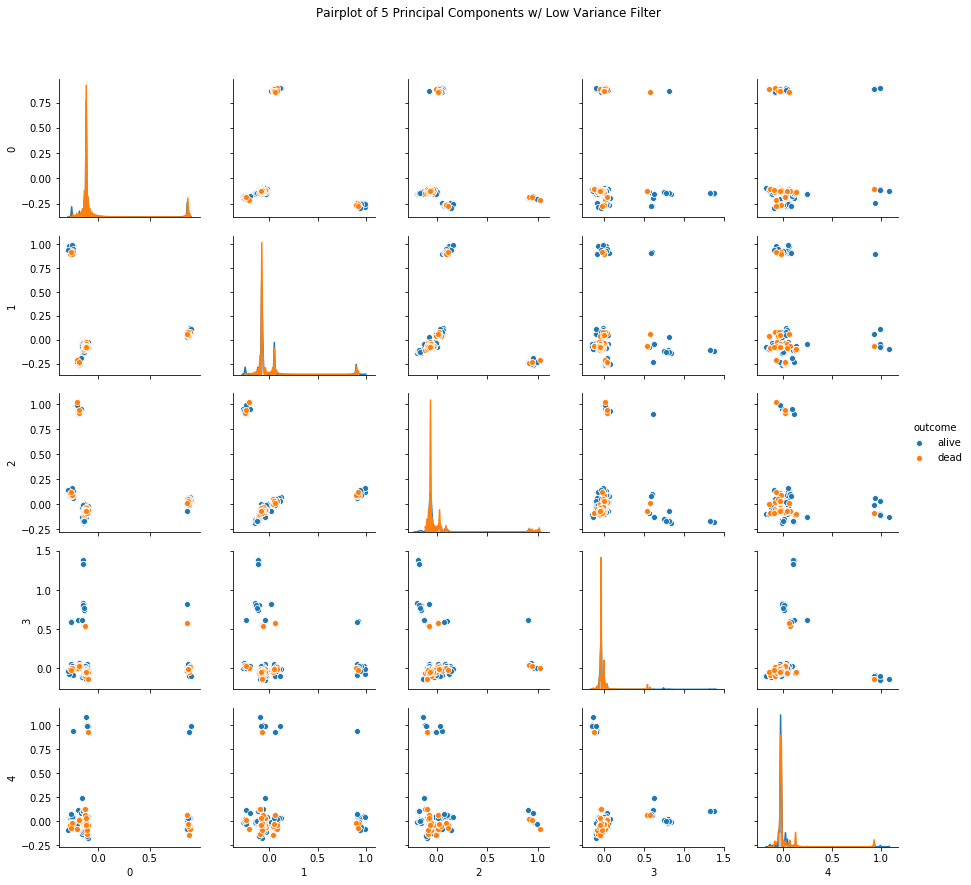

In [182]:
ax = sns.pairplot(pc, hue='outcome')
ax.fig.suptitle('Pairplot of 5 Principal Components w/ Low Variance Filter')
ax.fig.subplots_adjust(top=.9)

In [164]:
data = pd.read_csv('../data/TCGA_BRCA_loc_mutf.csv', index_col = 0)
for i in range(data.shape[0]):
    if data.iloc[i, 995] == 'alive':
        data.iloc[i, 995] = 0
    else:
        data.iloc[i, 995] = 1
corr = data.corr()['vital_status']
corr = corr.iloc[:989]

0.13870169367455631

In [175]:
above = 0
for i in range(len(corr)):
    if corr.iloc[i] > 0.05:
        above += 1
above

30